In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

C:\Users\jacks\AppData\Local\Temp\ipykernel_9588\948339632.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
epl23 = pd.read_csv(f'{path}/EPL2324.csv')
epl22 = pd.read_csv(f'{path}/EPL2223.csv')
epl21 = pd.read_csv(f'{path}/EPL2122.csv')
epl20 = pd.read_csv(f'{path}/EPL2021.csv')
epl19 = pd.read_csv(f'{path}/EPL1920.csv')
epl = pd.concat([epl19, epl20, epl21, epl22, epl23], axis=0)
epl = epl.dropna()

laliga23 = pd.read_csv(f'{path}/LaLiga2324.csv')
laliga22 = pd.read_csv(f'{path}/LaLiga2223.csv')
laliga21 = pd.read_csv(f'{path}/LaLiga2122.csv')
laliga20 = pd.read_csv(f'{path}/LaLiga2021.csv')
laliga19 = pd.read_csv(f'{path}/LaLiga1920.csv')
spa = pd.concat([laliga19, laliga20, laliga21, laliga22, laliga23], axis=0)
spa = spa.dropna()

ita23 = pd.read_csv(f'{path}/ITA2324.csv')
ita22 = pd.read_csv(f'{path}/ITA2223.csv')
ita21 = pd.read_csv(f'{path}/ITA2122.csv')
ita20 = pd.read_csv(f'{path}/ITA2021.csv')
ita19 = pd.read_csv(f'{path}/ITA1920.csv')
ita = pd.concat([ita19, ita20, ita21, ita22, ita23], axis=0)
ita = ita.dropna()

ger23 = pd.read_csv(f'{path}/Bundesliga2324.csv')
ger22 = pd.read_csv(f'{path}/Bundesliga2223.csv')
ger21 = pd.read_csv(f'{path}/Bundesliga2122.csv')
ger20 = pd.read_csv(f'{path}/Bundesliga2021.csv')
ger19 = pd.read_csv(f'{path}/Bundesliga1920.csv')
ger = pd.concat([ger19, ger20, ger21, ger22, ger23], axis=0)
ger = ger.dropna()

total_games = pd.concat([epl, spa, ita, ger], axis=0)
total_games.index = range(len(total_games))
fttg = total_games['FTHG'] + total_games['FTAG']
ftr_s = total_games['FTHG'].astype(str) + ':' + total_games['FTAG'].astype(str)
total_games.insert(loc = 7,
          column = 'FTTG',
          value = fttg)
total_games.insert(loc = 8,
          column = 'FTR_S',
          value = ftr_s)

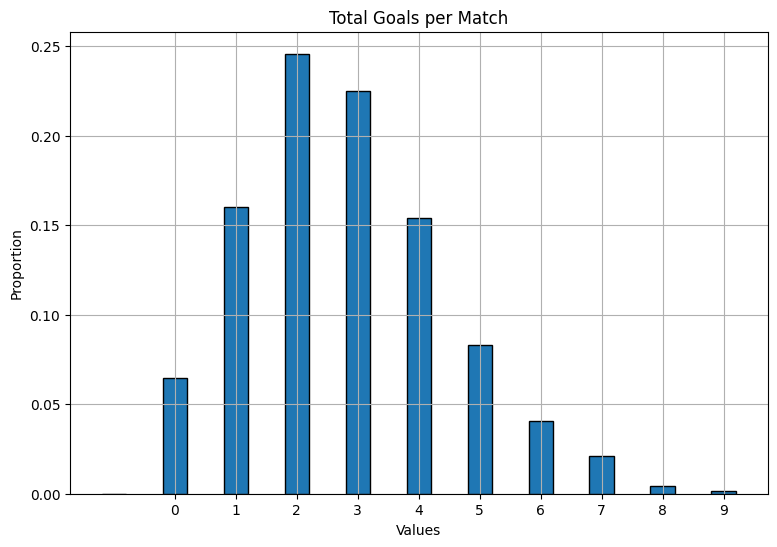

In [5]:
fttg = total_games['FTTG']
bin_edges = np.arange(-1.5, 10.5, 1)
plt.figure(figsize=(9, 6))
plt.hist(fttg, bins=bin_edges, edgecolor='black', rwidth=0.4, density=True)
plt.xlabel('Values')
plt.ylabel('Proportion')
plt.title('Total Goals per Match')
plt.grid(True)
plt.xticks(range(10))
plt.show()

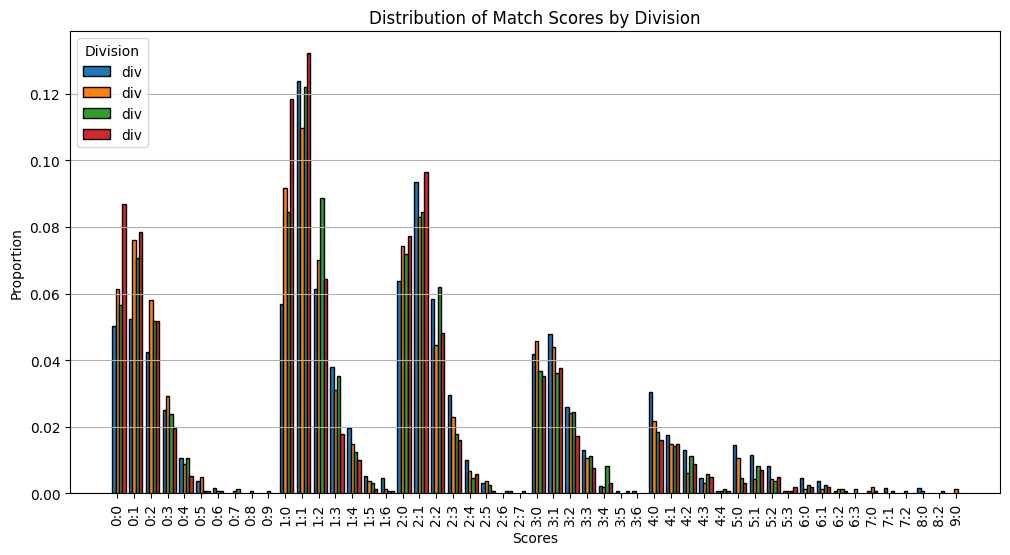

In [6]:

grouped = total_games.groupby(['Div', 'FTR_S']).size()
grouped = grouped.groupby(level=0).transform(lambda x: x / x.sum()).unstack()

# Plot setup
plt.figure(figsize=(12, 6))

# We need a base x for the positions of the first set of bars
base_x = np.arange(len(grouped.columns))

# Generate a bar plot for each division
width = 0.2  # Width of each bar, adjust as needed for clarity
for i, div in enumerate(grouped.index):
    plt.bar(base_x + i * width, grouped.loc[div, :], width=width, label=f'div', edgecolor='black')

plt.xlabel('Scores')
plt.ylabel('Proportion')
plt.title('Distribution of Match Scores by Division')
plt.xticks(base_x + width, grouped.columns)  # Adjust x-ticks to be in the middle of the groups
plt.legend(title='Division')
plt.grid(axis='y')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

plt.show()


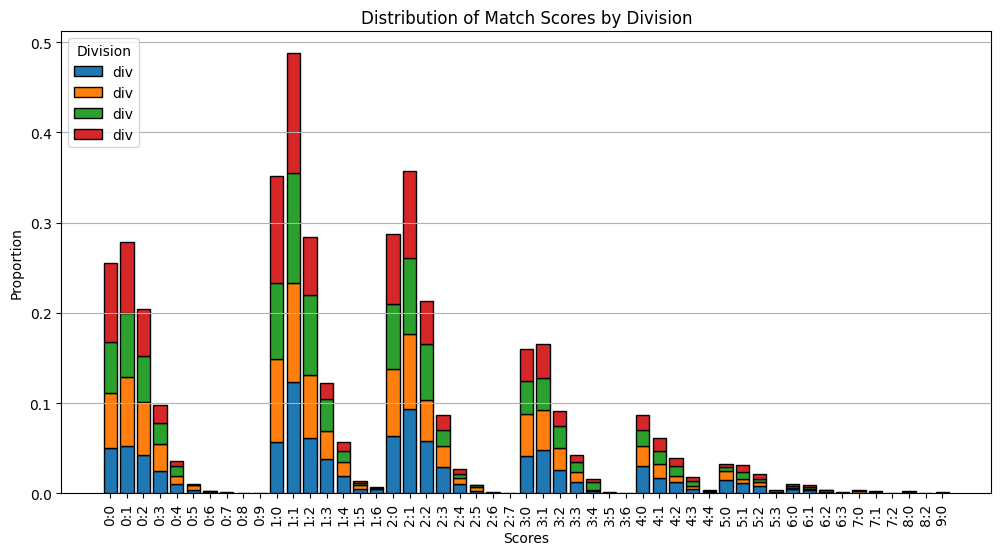

In [7]:
grouped = total_games.groupby(['Div', 'FTR_S']).size()
grouped = grouped.groupby(level=0).transform(lambda x: x/x.sum()).unstack()

# Plot setup
plt.figure(figsize=(12, 6))

# We need an array to hold the cumulative height of bars
cumulative_height = np.zeros(len(grouped.columns))

# Generate a stacked bar plot for each division
for div in grouped.index:
    plt.bar(grouped.columns, grouped.loc[div, :], bottom=cumulative_height, label='div', edgecolor='black')
    # Update the cumulative height to stack the bars
    cumulative_height += grouped.loc[div, :].fillna(0).values

plt.xlabel('Scores')
plt.ylabel('Proportion')
plt.title('Distribution of Match Scores by Division')
plt.xticks(grouped.columns, rotation=90)  # Set the labels for the x-axis
plt.legend(title='Division')
plt.grid(axis='y')

plt.show()


In [8]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [9]:
div_encoded = pd.get_dummies(total_games['Div'])
cols = ['B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5', 'AHh', 'B365AHH', 'B365AHA', 'B365CH', 'B365CD', 'B365CA', 'B365C>2.5', 'B365C<2.5', 'AHCh', 'B365CAHH', 'B365CAHA']
features = total_games[cols]
# features = pd.concat([features, div_encoded], axis=1)
total_games['Goal_Difference'] = total_games['FTHG'] - total_games['FTAG']
total_games['Goal_Difference'] = total_games['Goal_Difference'].clip(lower=-5, upper=5)
labels = total_games['FTR']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

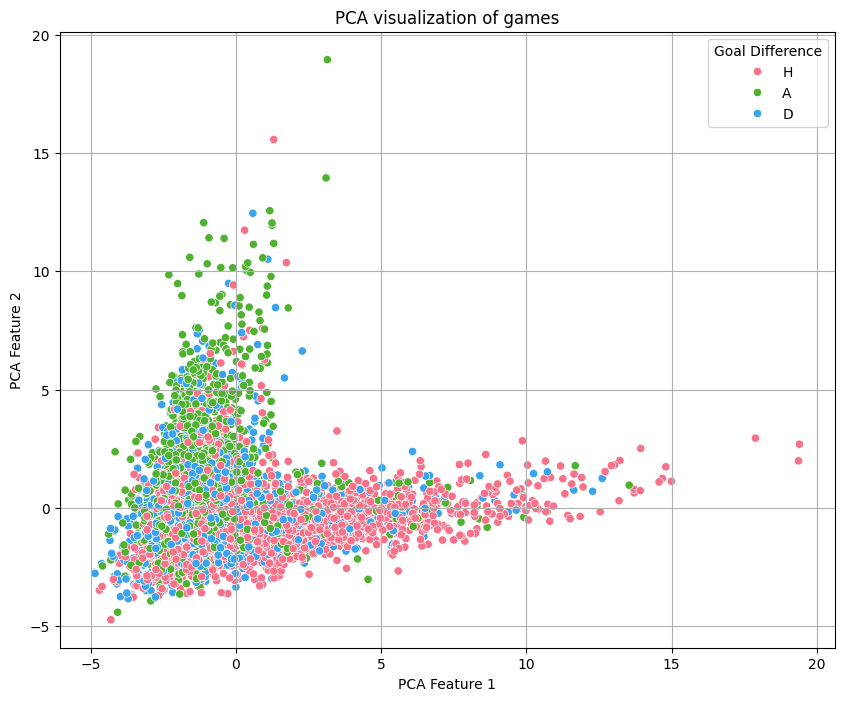

In [10]:
pca = PCA(n_components=0.9)  # Retain 95% of the variance
features_pca = pca.fit_transform(features_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=labels, palette="husl", legend="full")
plt.title('PCA visualization of games')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend(title='Goal Difference')
plt.grid(True)
plt.show()

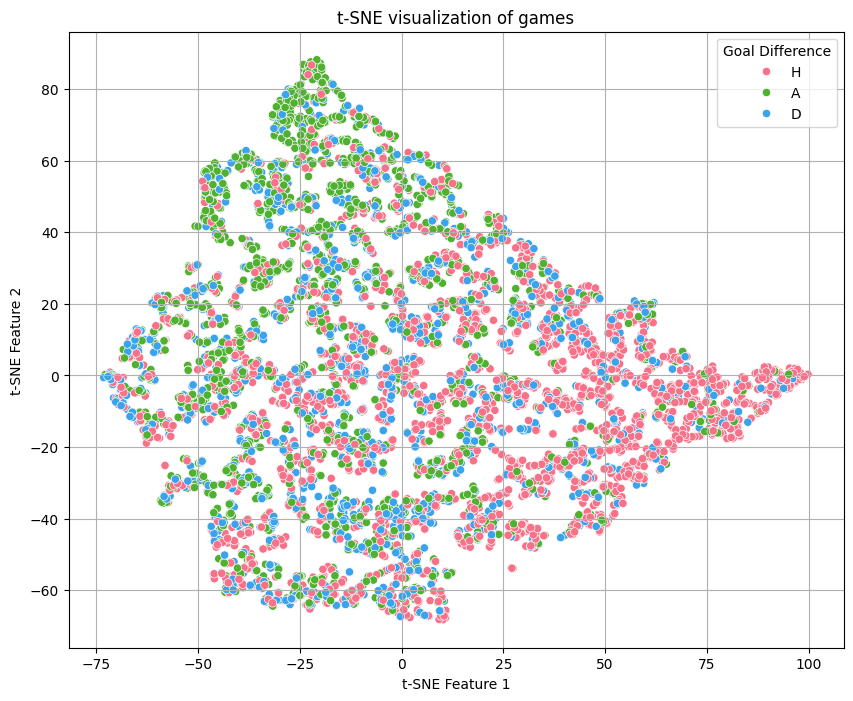

In [11]:
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_pca)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_tsne[:, 0], y=features_tsne[:, 1], hue=labels, palette="husl", legend="full")
plt.title('t-SNE visualization of games')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Goal Difference')
plt.grid(True)
plt.show()

D:\python\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


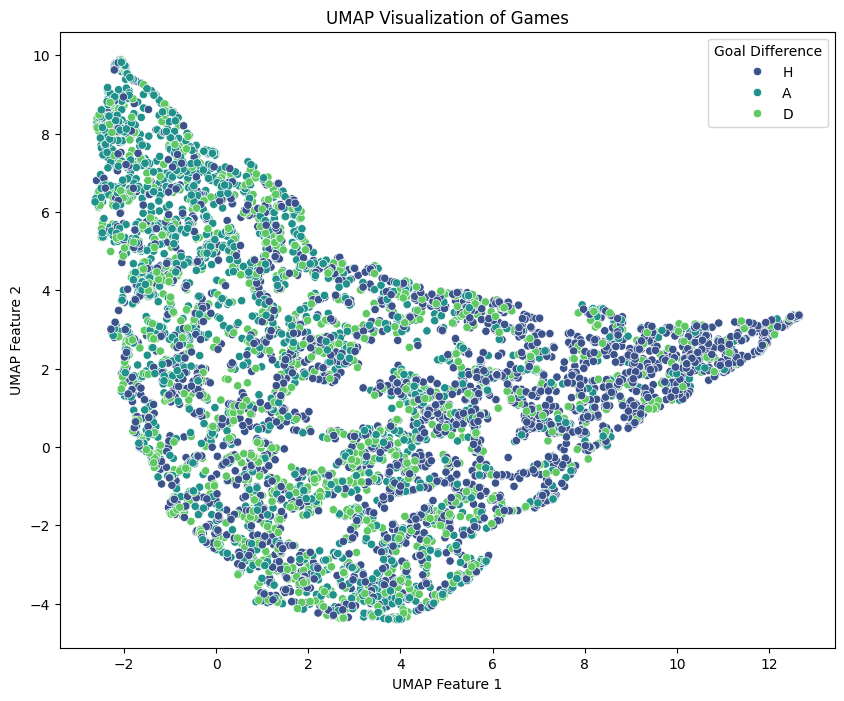

In [12]:
reducer = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)
features_umap = reducer.fit_transform(features_scaled)
plt.figure(figsize=(10, 8))
sns.scatterplot(x=features_umap[:, 0], y=features_umap[:, 1], hue=labels, palette="viridis", legend="full")
plt.title('UMAP Visualization of Games')
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.legend(title='Goal Difference')

Accuracy: 0.5361397934868943
Confusion Matrix:
 [[228   8 142]
 [120  10 196]
 [108  10 437]]


D:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


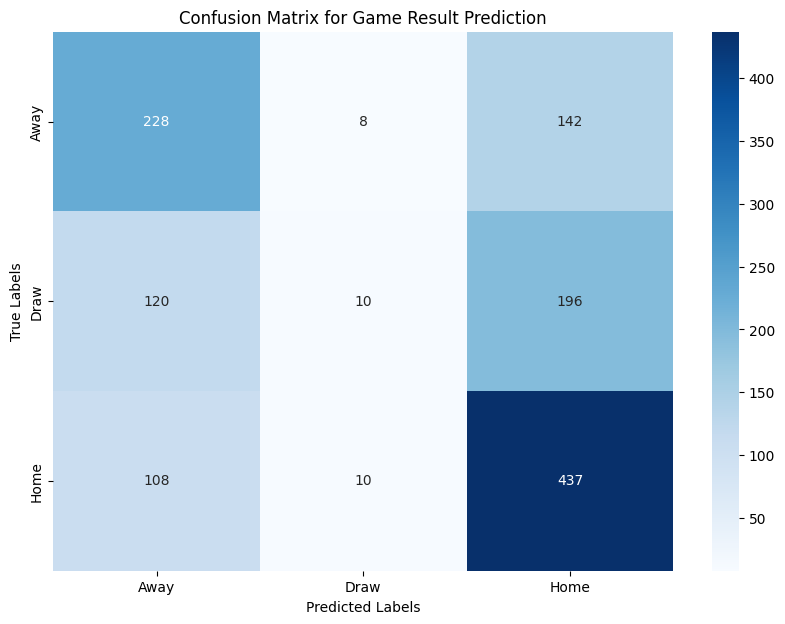

In [14]:
# Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


lr_games = total_games.copy()
label_encoder = LabelEncoder()
lr_games['FTR'] = label_encoder.fit_transform(lr_games['FTR'])
cols = ['B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5', 'AHh', 'B365AHH', 'B365AHA', 'B365CH', 'B365CD', 'B365CA', 'B365C>2.5', 'B365C<2.5', 'AHCh', 'B365CAHH', 'B365CAHA']
X = lr_games[cols]
y = lr_games['FTR']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression Model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Predict
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)


# Plotting the confusion matrix
labels = ['Away', 'Draw', 'Home']
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Game Result Prediction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Accuracy for FTR prediction: 0.49722001588562353
Mean Squared Error for FTTG prediction: 2.871603494837172


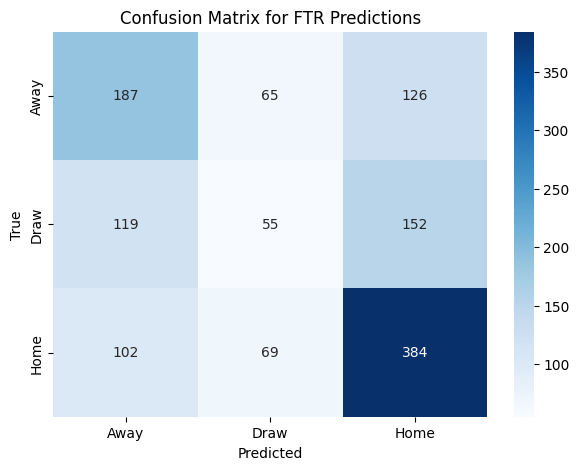

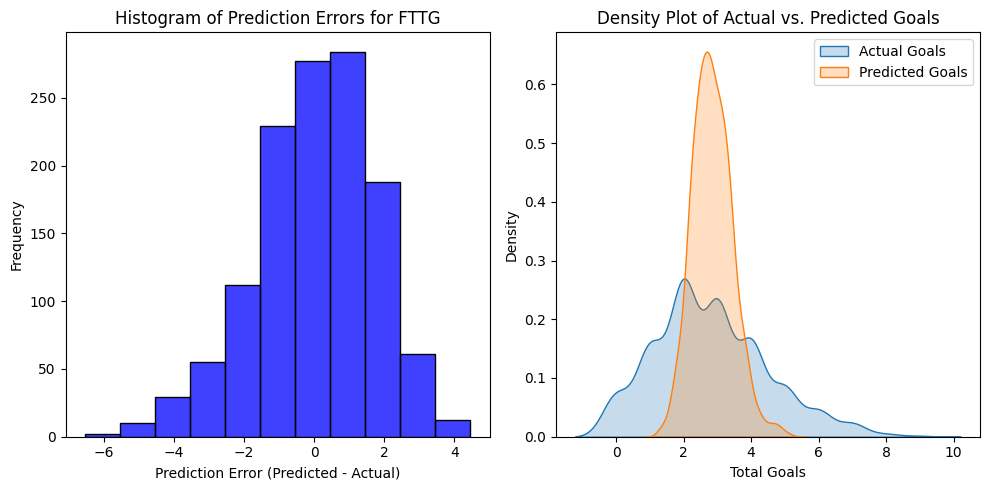

In [15]:
# Random Forest to predict game result and total goals
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


rf_games = total_games.copy()
label_encoder = LabelEncoder()
rf_games['FTR'] = label_encoder.fit_transform(rf_games['FTR'])
cols = ['B365H', 'B365D', 'B365A', 'B365>2.5', 'B365<2.5', 'AHh', 'B365AHH', 'B365AHA', 'B365CH', 'B365CD', 'B365CA', 'B365C>2.5', 'B365C<2.5', 'AHCh', 'B365CAHH', 'B365CAHA']
X = rf_games[cols]
y1 = rf_games['FTR']
y2 = rf_games['FTTG']
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)
# Random Forest model for FTR (categorical, classification)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y1_train)

# Random Forest model for FTTG (numerical, regression)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y2_train)

# Predictions for FTR
y1_pred = rf_classifier.predict(X_test)
ftr_accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy for FTR prediction: {ftr_accuracy}')

# Predictions for FTTG
y2_pred = rf_regressor.predict(X_test)
fttg_mse = mean_squared_error(y2_test, y2_pred)
print(f'Mean Squared Error for FTTG prediction: {fttg_mse}')

# Plotting the confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for FTR Predictions')
plt.show()

errors = y2_pred - y2_test

# Histogram of Prediction Errors
labels = ['Away', 'Draw', 'Home']
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
bin_edges = np.arange(errors.min() - 0.5, errors.max() + 1.5)  # Create bins from min error to max error + 1
sns.histplot(errors, kde=False, color='blue',bins=bin_edges)
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors for FTTG')

# Density Plot for Predicted vs Actual Goals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.kdeplot(y2_test, label='Actual Goals', fill=True)
sns.kdeplot(y2_pred, label='Predicted Goals', fill=True)
plt.xlabel('Total Goals')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Goals')
plt.legend()
plt.tight_layout()
plt.show()

Accuracy for FTR prediction: 0.44082605242255757
Mean Squared Error for FTTG prediction: 2.6951343014650724


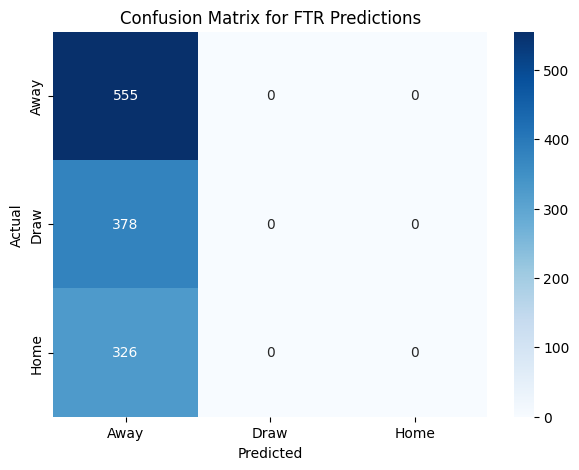

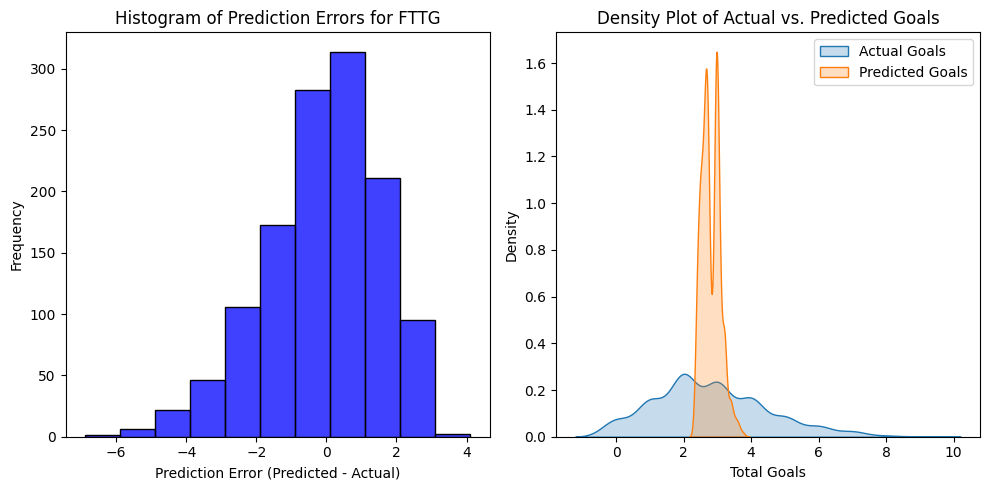

In [19]:
# XGBoost to predict game results and total goals
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

xg_games = total_games.copy()
xg_games.columns = [col.replace('<', '1').replace('>', '2') for col in xg_games.columns]
# Preparing feature matrix X and target vectors y1 for FTR, y2 for FTTG
label_encoder = LabelEncoder()
xg_games['FTR'] = label_encoder.fit_transform(xg_games['FTR'])
cols = ['B365H', 'B365D', 'B365A', 'B36522.5', 'B36512.5', 'AHh', 'B365AHH', 'B365AHA', 'B365CH', 'B365CD', 'B365CA', 'B365C22.5', 'B365C12.5', 'AHCh', 'B365CAHH', 'B365CAHA']
X = xg_games[cols]
y1 = xg_games['FTR']  # Classification target
y2 = xg_games['FTTG']  # Regression target

# Splitting data
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

dtrain_ftr = xgb.DMatrix(X_train, label=pd.factorize(y1_train)[0])  # Factorize to convert labels to integers
dtest_ftr = xgb.DMatrix(X_test, label=pd.factorize(y1_test)[0])

params_ftr = {'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 2, 'subsample': 0.6}

# Train the model
bst_ftr = xgb.train(params_ftr, dtrain_ftr, num_boost_round=10)

# For regression of FTTG
dtrain_fttg = xgb.DMatrix(X_train, label=y2_train)
dtest_fttg = xgb.DMatrix(X_test, label=y2_test)

params_fttg = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror'
}

# Train the model
bst_fttg = xgb.train(params_fttg, dtrain_fttg, num_boost_round=10)

# Prediction for FTR
preds_ftr = bst_ftr.predict(dtest_ftr)
best_preds_ftr = np.asarray([np.argmax(line) for line in preds_ftr])

# Prediction for FTTG
preds_fttg = bst_fttg.predict(dtest_fttg)

actual_ftr = pd.factorize(y1_test)[0]  # Ensure the test labels are factorized similarly
accuracy_ftr = accuracy_score(actual_ftr, best_preds_ftr)
print("Accuracy for FTR prediction:", accuracy_ftr)

# Evaluation for FTTG
mse_fttg = mean_squared_error(y2_test, preds_fttg)
print("Mean Squared Error for FTTG prediction:", mse_fttg)

# Plot the confusion matrix
labels = ['Away', 'Draw', 'Home']
cm_ftr = confusion_matrix(actual_ftr, best_preds_ftr)
plt.figure(figsize=(7, 5))
sns.heatmap(cm_ftr, annot=True, fmt="d", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for FTR Predictions')
plt.show()


errors = preds_fttg - y2_test

# Histogram of Prediction Errors
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
bin_edges = np.arange(errors.min() - 0.5, errors.max() + 1.5)  # Create bins from min error to max error + 1
sns.histplot(errors, kde=False, color='blue',bins=bin_edges)
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors for FTTG')

# Density Plot for Predicted vs Actual Goals
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
sns.kdeplot(y2_test, label='Actual Goals', fill=True)
sns.kdeplot(preds_fttg, label='Predicted Goals', fill=True)
plt.xlabel('Total Goals')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs. Predicted Goals')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBClassifier

# xgb_model = XGBClassifier(
#     objective='multi:softprob', 
#     num_class=3, 
#     eval_metric='mlogloss', 
#     use_label_encoder=False  # Added to avoid deprecation warnings with label encoding
# )

# # Parameters to be tuned
# parameters = {
#     'max_depth': [3, 4, 5, 6],
#     'min_child_weight': [1, 2, 3],
#     'gamma': [0, 0.1, 0.2],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0],
#     'learning_rate': [0.01, 0.1, 0.2]  # Learning rate can significantly impact the model performance
# }

# # Setting up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=xgb_model, 
#     param_grid=parameters, 
#     scoring='accuracy', 
#     n_jobs=-1, 
#     cv=3, 
#     verbose=2
# )

# # Fit GridSearchCV
# grid_search.fit(X_train, y1_train)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best accuracy obtained: ", grid_search.best_score_)